In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("../data/survey.csv")

df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [10]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


#### Here we can clearly see that age column from the dataset is corrupted with incorrect data, see the mean is around 7.94 x 10^7 which is obviously impossible for a human, also standard deviation which is the spread of data on mean is also very high. Minimum age is below negative which is not possible and maximum age is 10^11 which is out of ths world.

## Cleaning data

In [14]:
df.isnull().sum().sort_values(ascending=False)

comments                     1095
state                         515
work_interfere                264
self_employed                  18
Gender                          0
Timestamp                       0
Age                             0
family_history                  0
treatment                       0
no_employees                    0
Country                         0
remote_work                     0
tech_company                    0
care_options                    0
benefits                        0
seek_help                       0
anonymity                       0
leave                           0
wellness_program                0
mental_health_consequence       0
phys_health_consequence         0
supervisor                      0
coworkers                       0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
dtype: int64

In [19]:
# Droppin columns with too many missing values
df.drop(columns=['state'], axis=1, inplace=True)

In [23]:
df['work_interfere'].fillna('Don’t know', inplace=True)

df['self_employed'].fillna('NAN', inplace=True)

In [25]:
df.head()

df.isnull().sum().sort_values(ascending=False)

Timestamp                    0
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

#### Thus, now there is no missing values in the dataset.

### Check for inconsistent columns

In [26]:
for col in df.columns:
  if df[col].dtype == "object":
    print(f"\n Unique Values in '{col}:")
    print(df[col].unique())


 Unique Values in 'Timestamp:
['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44' ...
 '2015-11-07 12:36:58' '2015-11-30 21:25:06' '2016-02-01 23:04:31']

 Unique Values in 'Gender:
['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']

 Unique Values in 'Country:
['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 

#### From above observations, we can clearly see only gender column contains inconsistent entries and timestamp contains too many unique entries which is also irrelevant to us.

In [28]:
df.drop("Timestamp", axis=1, inplace=True)

### Standardize Gender

In [29]:
def clean_gender(gender):
  gender = str(gender).strip().lower()
  male_terms = ['male', 'm', 'man', 'msle', 'mail', 'malr', 'mal', 'cis male', 'cis man', 'guy', 'make']
  female_terms = ['female', 'f', 'woman', 'femake', 'cis female', 'cis-female/femme', 'female (cis)', 'female (trans)', 'trans-female']

  if gender in male_terms:
    return "Male"
  
  if gender in female_terms:
    return "Female"
  
  else:
    return "Other"

df['gender'] = df['Gender'].apply(clean_gender)

In [30]:
df['gender'].head()

0    Female
1      Male
2      Male
3      Male
4      Male
Name: gender, dtype: object

In [35]:
df.drop(columns=['Gender'], errors='ignore', inplace=True)

In [37]:
df.head()

,Age,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,gender
0,37,United States,NAN,No,Yes,Often,6-25,No,Yes,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,Female
1,44,United States,NAN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,Male
2,32,Canada,NAN,No,No,Rarely,6-25,No,Yes,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,Male
3,31,United Kingdom,NAN,Yes,Yes,Often,26-100,No,Yes,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Male
4,31,United States,NAN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Male


## Visualize Data

### Gender and Age Distribution

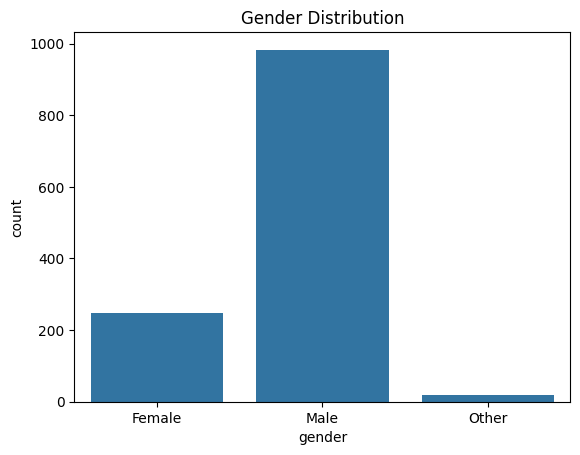

In [72]:
sns.countplot(data=df, x="gender")
plt.title("Gender Distribution")
plt.savefig('../images/gender_distribution.png')

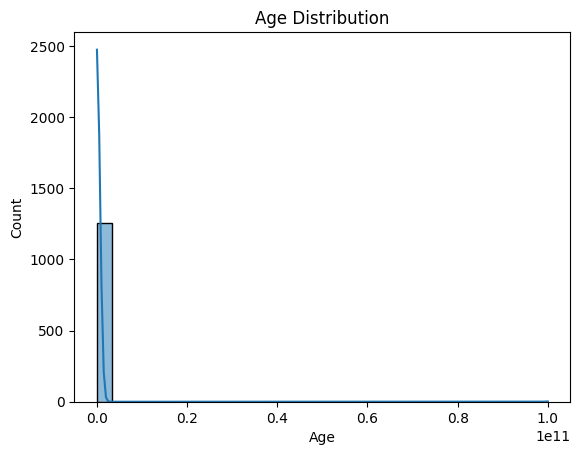

In [54]:
sns.histplot(data=df, x="Age", bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

#### The above histogram suggests that age column is corrupted with some extreme outliers. I think someone migh have entered their phone no or salary as age.

In [55]:
df = df[(df['Age'] >= 15) & (df['Age'] <= 100)]   # removing unrealistic ages

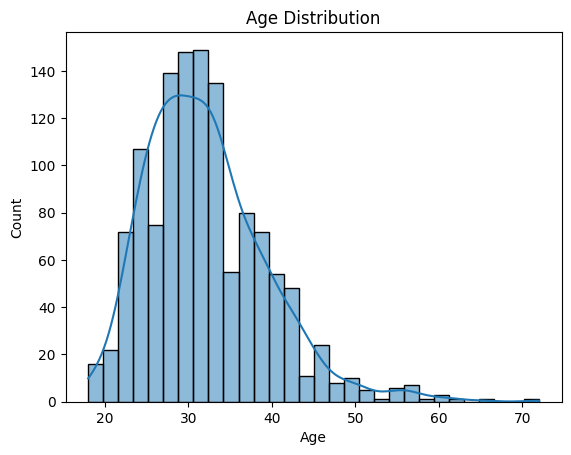

In [71]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.savefig('../images/age_distribution.png')

#### From above histogram and kernel density estimate shows that the in the dataset many people are around the age of 30 and less likely to be around the age of 15 or 60.

### Mental health vs. Company size

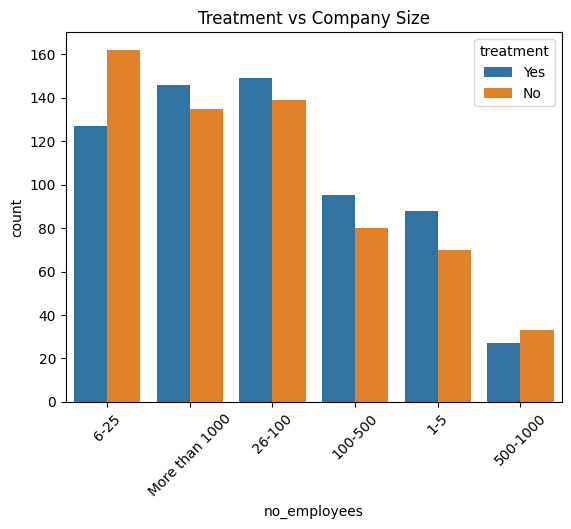

In [70]:
sns.countplot(data=df, x="no_employees", hue="treatment")
plt.title('Treatment vs Company Size')
plt.xticks(rotation=45)
plt.savefig('../images/mentalhealthvscompanysize.png')

#### We can observe from here employee from larger companies seeks for treatment more, might be due to company policies and smaller companies seems to ignore mental health treatment.

### Remote work vs. Mental Health

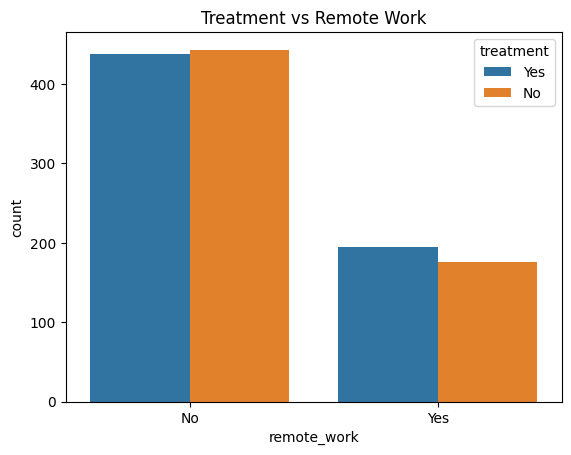

In [69]:
sns.countplot(data=df, x='remote_work', hue="treatment")
plt.title("Treatment vs Remote Work")
plt.savefig('../images/treatmentvsremotework.png')

#### Here we see balance between both.

## Heatmap of correlation

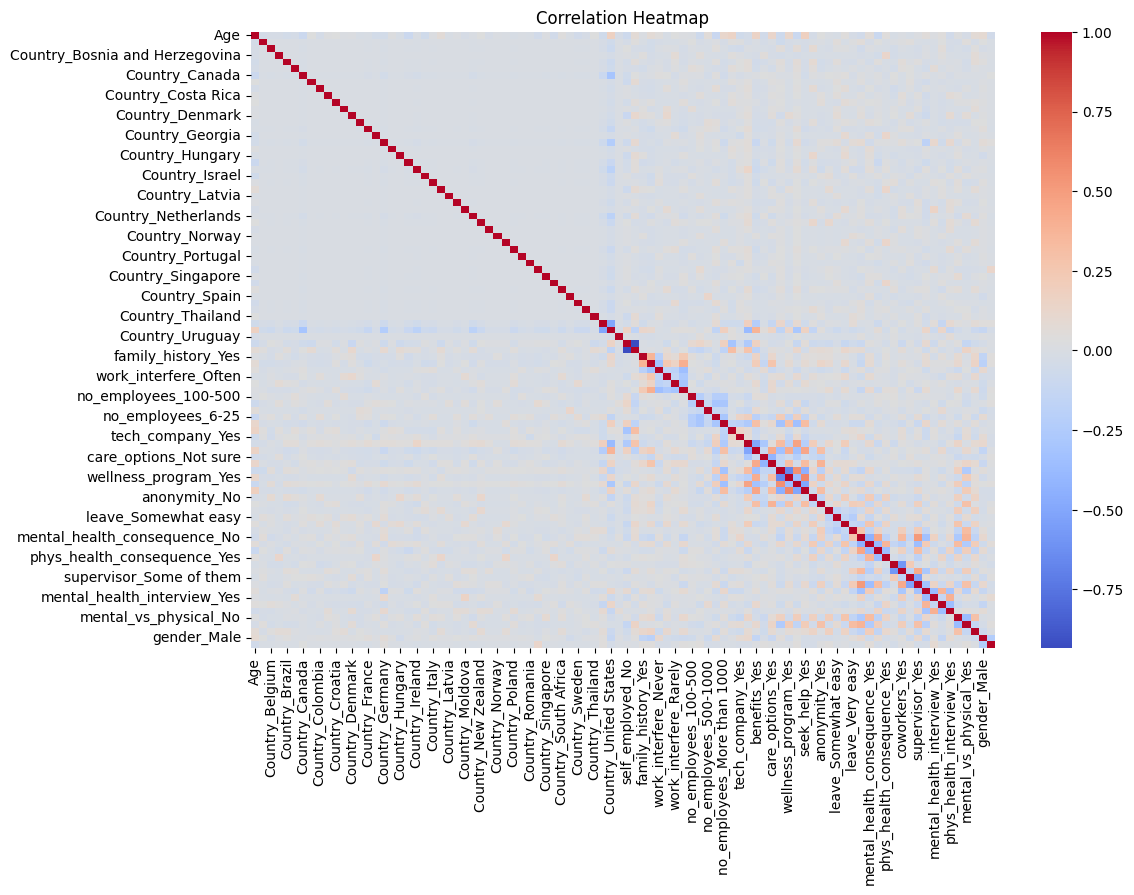

In [68]:
df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.savefig('../images/correlation_heatmap.png')

#### From the above heatmap correlation, I derived the following insights:
1. The heatmap is lightly colored which means most variables are weakly correlated and has low multicollinearity which is ideal for ml modelling.
2. mental_health_interview_Yes shows positive  correlation with: family_history_Yes and work_interfere_Often
3. leave_Somewhat easy and leave_Very easy show negative correlation with: work_interfere_Often and mental_health_consequence_Yes
4. phys_health_consequence_Yes and mental_health_consequence_Yes show a positive correlation.
5. gender_Male has some negative or weak correlations with: mental_health_interview_Yes and mental_health_consequence_Yes
6. phys_health_consequence_Yes and mental_health_consequence_Yes show a positive correlation.